<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Image-Inpainting AutoEncoder || Generative-AI🔥</div>
</div>

![](https://miro.medium.com/v2/resize:fit:1400/0*XDSquMA8IDDbUrBT.png)

Image inpainting is a technique used in computer vision and image processing to fill in missing or damaged parts of an image. The goal is to reconstruct the missing regions in a way that is visually plausible and consistent with the surrounding context. This technique has various applications, including photo restoration, object removal, and image editing.

### Key Concepts in Image Inpainting

1. **Contextual Information**: Inpainting algorithms use the information from the surrounding pixels to fill in the missing areas. The quality of inpainting depends on how well the algorithm can understand and replicate the patterns and textures from the surrounding areas.

2. **Spatial Consistency**: The inpainted region should blend seamlessly with the neighboring regions. This involves maintaining the edges and continuity of lines and textures.

3. **Perceptual Quality**: The filled-in area should be perceptually plausible, meaning it should look natural to the human eye and not exhibit any noticeable artifacts.

### Types of Image Inpainting Methods

1. **Traditional Methods**:
   - **Diffusion-Based Methods**: These methods propagate pixel information from the surrounding area into the missing region using partial differential equations. Examples include the Telea algorithm and the Bertalmio algorithm.
   - **Patch-Based Methods**: These methods fill in the missing region by copying similar patches from other parts of the image. The Criminisi algorithm is a well-known example.

2. **Deep Learning Methods**:
   - **Autoencoders**: Autoencoders can be trained to reconstruct missing parts of an image. They learn a compressed representation of the image and then decode it to fill in the missing regions.
   - **Generative Adversarial Networks (GANs)**: GANs are widely used for image inpainting. They consist of a generator and a discriminator, where the generator creates inpainted images and the discriminator evaluates their realism. Examples include the Context Encoder and the DeepFill methods.
   - **Variational Autoencoders (VAEs)**: VAEs can also be used for image inpainting by learning a probabilistic representation of the image data.

### Image Inpainting Using Autoencoders

Autoencoders are a type of neural network designed to learn a compressed representation of input data and then reconstruct it. In the context of image inpainting, autoencoders can be used to fill in missing parts of an image. Here is a high-level overview of how this works:

1. **Encoder**: The encoder compresses the input image (with missing regions) into a lower-dimensional latent representation.
2. **Decoder**: The decoder reconstructs the image from this latent representation, attempting to fill in the missing regions based on the learned features.

### Example Workflow

1. **Data Preparation**:
   - Load the dataset (e.g., CIFAR-10).
   - Create masks to simulate missing parts in the images.

2. **Model Architecture**:
   - Define the autoencoder architecture with convolutional layers for the encoder and decoder.

3. **Training**:
   - Train the autoencoder using the masked images as input and the original images as target output.

4. **Prediction**:
   - Use the trained autoencoder to predict the inpainted images from the masked input images.

5. **Evaluation**:
   - Compare the inpainted images with the original images to evaluate the performance.

### Applications

- **Photo Restoration**: Repairing old or damaged photographs.
- **Object Removal**: Removing unwanted objects from images and filling in the resulting gaps.
- **Image Editing**: Modifying images by seamlessly adding or removing content.
- **Medical Imaging**: Filling in missing parts of medical images for better diagnosis.

### Challenges

- **Complex Patterns**: Inpainting complex patterns and textures can be challenging.
- **Large Missing Regions**: Filling in large missing areas requires sophisticated understanding of the image context.
- **Realism**: Ensuring the inpainted region looks natural and free from artifacts.

### Conclusion

Image inpainting is a powerful technique for reconstructing missing parts of images. With the advancements in deep learning, especially autoencoders and GANs, the ability to perform high-quality inpainting has significantly improved, making it a valuable tool in various fields.

<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📚 Importing Libraries 📚</div>

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

2024-07-04 16:55:40.735867: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 16:55:40.736004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 16:55:40.864703: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🧾Loading Dataset🧾</div>
</div>

In [3]:
# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠 Normalization 🛠</div>
</div>

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠 Mask Creation 🛠</div>
</div>

In [5]:
# Create masks for image inpainting
def create_masked_images(images, mask_size=8):
    masked_images = images.copy()
    masks = np.zeros_like(images)
    for img, mask in zip(masked_images, masks):
        x = np.random.randint(0, img.shape[0] - mask_size)
        y = np.random.randint(0, img.shape[1] - mask_size)
        img[x:x+mask_size, y:y+mask_size, :] = 0
        mask[x:x+mask_size, y:y+mask_size, :] = 1
    return masked_images, masks


Let's break down the `create_masked_images` function line by line:

```python
def create_masked_images(images, mask_size=8):
```
- This line defines a function named `create_masked_images` that takes two arguments:
  - `images`: The input images, expected to be a NumPy array of shape (num_images, height, width, channels).
  - `mask_size`: The size of the square mask to be applied to the images. The default value is 8.

```python
    masked_images = images.copy()
```
- This line creates a copy of the input `images` array. The `masked_images` array will be used to apply the masks, leaving the original `images` array unchanged.

```python
    masks = np.zeros_like(images)
```
- This line creates an array `masks` of the same shape as `images`, filled with zeros. This array will be used to store the mask locations, where 1 will indicate masked pixels and 0 will indicate unmasked pixels.

```python
    for img, mask in zip(masked_images, masks):
```
- This line starts a for loop that iterates over pairs of corresponding elements from `masked_images` and `masks`. `img` will be a single image from `masked_images`, and `mask` will be the corresponding mask from `masks`.

```python
        x = np.random.randint(0, img.shape[0] - mask_size)
        y = np.random.randint(0, img.shape[1] - mask_size)
```
- These lines generate random integers `x` and `y` that determine the top-left corner of the square mask. The mask will be placed randomly within the bounds of the image, ensuring it fits entirely within the image dimensions.
  - `np.random.randint(0, img.shape[0] - mask_size)`: Generates a random integer between 0 and (height of the image - mask_size).
  - `np.random.randint(0, img.shape[1] - mask_size)`: Generates a random integer between 0 and (width of the image - mask_size).

```python
        img[x:x+mask_size, y:y+mask_size, :] = 0
```
- This line applies the mask to the image. It sets the pixel values of the region defined by the coordinates `(x:x+mask_size, y:y+mask_size, :)` to 0, effectively masking this region. The mask covers `mask_size` x `mask_size` pixels.

```python
        mask[x:x+mask_size, y:y+mask_size, :] = 1
```
- This line updates the mask array to reflect the masked region. It sets the corresponding region in the `mask` array to 1, indicating that these pixels are masked.

```python
    return masked_images, masks
```
- This line returns two arrays:
  - `masked_images`: The array of images with the applied masks.
  - `masks`: The array indicating the locations of the masks.

### Summary

The `create_masked_images` function takes an array of images and creates a masked version of these images by randomly placing square masks of a specified size on each image. It returns the masked images and a mask array indicating where the masks were applied.

In [6]:
mask_size = 8
x_train_masked, train_masks = create_masked_images(x_train, mask_size)
x_test_masked, test_masks = create_masked_images(x_test, mask_size)

<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Image-Inpainting AutoEncoder Model 🔥</div>

In [7]:
# Define the autoencoder model
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


In [8]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Model Summary ✔
  </div>
</div>

In [9]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,331,459 (5.08 MB)

 Trainable params: 1,331,459 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Model Training ✔
  </div>
</div>

In [10]:
# Train the autoencoder
autoencoder.fit(x_train_masked, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_masked, x_test))


Epoch 1/50
 10/391 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.6909

I0000 00:00:1720112211.819467     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - loss: 0.6112 - val_loss: 0.5733
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.5715 - val_loss: 0.5696
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.5669 - val_loss: 0.5665
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.5651 - val_loss: 0.5642
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.5628 - val_loss: 0.5625
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.5615 - val_loss: 0.5614
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.5620 - val_loss: 0.5610
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.5606 - val_loss: 0.5607
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.5592 - val_loss: 0.5605
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.5590 - val_loss: 0.5601
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.5595 - val_loss: 0.5594
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/st

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Image-Inpainting AutoEncoder Prediction🔥</div>
</div>

In [11]:
# Predict inpainted images
predicted_images = autoencoder.predict(x_test_masked)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


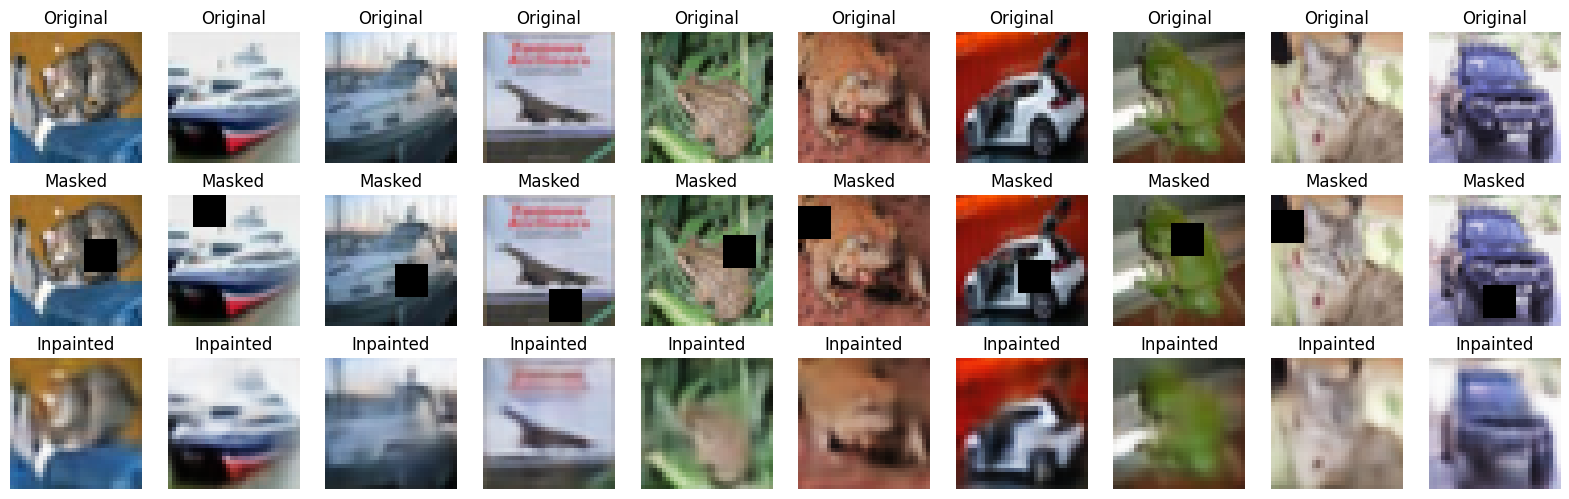

In [12]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Masked
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_masked[i])
    plt.title("Masked")
    plt.axis("off")

    # Inpainted
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predicted_images[i])
    plt.title("Inpainted")
    plt.axis("off")
plt.show()